# SINKING OF THE TITANIC - ANALYSIS
https://www.kaggle.com/c/titanic/data

Source: https://en.wikipedia.org/wiki/Sinking_of_the_Titanic

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
! git clone https://github.com/Maages09/XGBoost.git

fatal: destination path 'XGBoost' already exists and is not an empty directory.


In [ ]:
data= pd.read_csv('/content/XGBoost/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###  Choosing features :  Feature Selection

In [ ]:
data= data[['Pclass','Sex','Age','Survived','Parch','SibSp']]

In [ ]:
data.head()

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,male,22.0,0,0,1
1,1,female,38.0,1,0,1
2,3,female,26.0,1,0,0
3,1,female,35.0,1,0,1
4,3,male,35.0,0,0,0


###  Encoding variables

In [ ]:
data['Sex'] = data['Sex'].map( {'male':0,'female':1} )

<ipython-input-6-78019fa04e13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].map( {'male':0,'female':1} )


In [ ]:
data.head(10)

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,0,22.0,0,0,1
1,1,1,38.0,1,0,1
2,3,1,26.0,1,0,0
3,1,1,35.0,1,0,1
4,3,0,35.0,0,0,0
5,3,0,NaN,0,0,0
6,1,0,54.0,0,0,0
7,3,0,2.0,0,1,3
8,3,1,27.0,1,2,0
9,2,1,14.0,1,0,1


### Null variables and missing values

In [ ]:
data = data.dropna()

### Select output and input variables

In [ ]:
X = data.drop('Survived',axis=1)
y = data['Survived']

### Split train and test

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)

### Chossing Classifier

In [ ]:
model = XGBClassifier()

### Fitting model

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

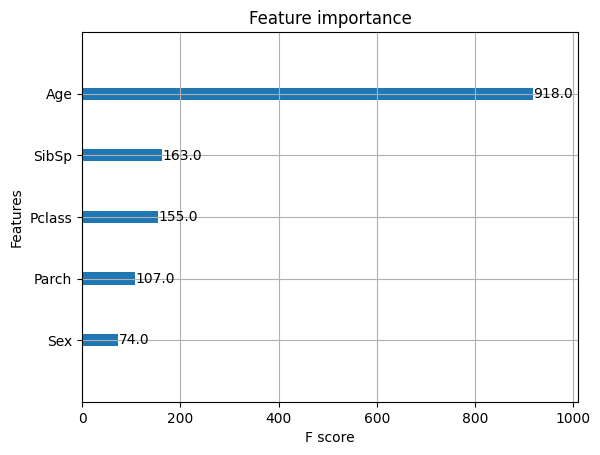

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_importance(model, ax=plt.gca())

### Predicting new values

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[1:10]

array([0, 1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
X_test.loc[0]

Pclass     3.0
Sex        0.0
Age       22.0
Parch      0.0
SibSp      1.0
Name: 0, dtype: float64

## Accuracy

#### Training accuracy

In [ ]:
model.score(X_train, y_train) ## accuracy

0.9196261682242991

In [ ]:
pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train,pred_train)

array([[300,  12],
       [ 31, 192]])

#### Testing accuracy

In [ ]:
model.score(X_test, y_test)

0.8379888268156425

In [ ]:
confusion_matrix(y_test,predictions)

array([[98, 14],
       [15, 52]])